# TINIH

TINIH is a simple on-chain, stateless, controller that attempts at regulating price of an item through modification of the item's spawn rate, depending on the ratio of the market price and a target price.

## The 8yo thinkoooooor

We are trying to design a function that outputs a spawn rate, i.e. a probability, so the output $R$ *has* to satisfy the following : $R \in [0, 1]$.

Immediately, it reminded me of the sigmoid logistic function used in DL. As a reminder, it looks like that : $ f(x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

When we plot it, it looks like that.

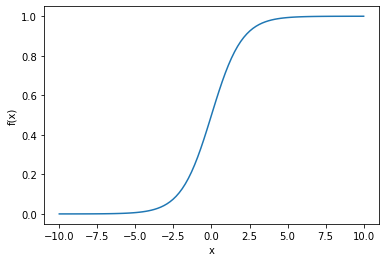

In [11]:
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("f(x)")
  
plt.show()

There is one issue though... In this case, the input is the ratio between the current market price of the item and the targeted price, whose lower bound is just ... $0$. The issue if we use this function, is that even if the ratio is $0$, which means that there is such an abundance of items that the price is extremely low, the spawn rate will still be super high (comparatively) when we want it to be much lower (to constrict supply, hopefully).

This is how it looks like. Not very good.

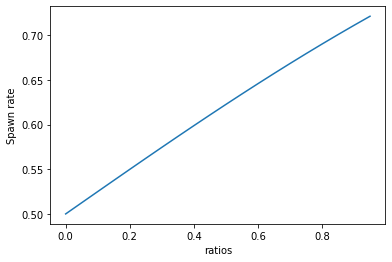

In [18]:
ratios = np.arange(0, 1, 0.05)
z = 1/(1 + np.exp(-ratios))

plt.plot(ratios, z)
plt.xlabel("ratios")
plt.ylabel("Spawn rate")
  
plt.show()

## My man Weibull

That's where my man [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution) comes in. If you take a look at the CDF, you can adjust the parameters to reproduce the same behavior as the sigmoid function.



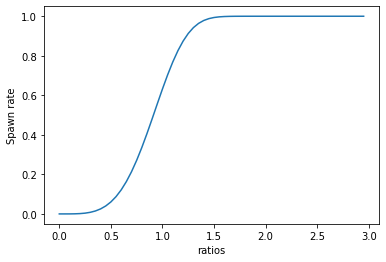

In [17]:
lambd, k = 1, 4
ratios = np.arange(0, 3, 0.05)
z = 1 - np.exp(-(ratios**k))

plt.plot(ratios, z)
plt.xlabel("ratios")
plt.ylabel("Spawn rate")
  
plt.show()

As you can see, its behavior is much closer to what we want.
A low ratio means a price too low therefore a supply too abundant, to which we try to remedy by making the issuance of the item rarer.
A high ratio means a price too high therefore a supply too scarce, to which we try to remedy by making the issuance of the item more common.